In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation, Dense, Dropout, GRU
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

C:\Users\Paxto\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("BTC_DATA_V3.0.csv")
data = data.iloc[:,0:6]
y = data.loc[:,['Price']]
data = data.drop(['Price','Vol.'],axis='columns')
print(data.head(5))
print(y.head(5))

        Date     Open     High      Low
0  25-Mar-22  44013.0  45112.0  43622.0
1  24-Mar-22  42911.0  44251.0  42658.0
2  23-Mar-22  42373.0  43027.0  41795.0
3  22-Mar-22  41022.0  43327.9  40893.0
4  21-Mar-22  41282.0  41532.0  40530.0
     Price
0  44331.0
1  44013.0
2  42912.0
3  42373.0
4  41022.0


In [3]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index,unit='ns')
print(data.index)

DatetimeIndex(['2022-03-25', '2022-03-24', '2022-03-23', '2022-03-22',
               '2022-03-21', '2022-03-20', '2022-03-19', '2022-03-18',
               '2022-03-17', '2022-03-16',
               ...
               '2018-03-07', '2018-03-06', '2018-03-05', '2018-03-04',
               '2018-03-03', '2018-03-02', '2018-03-01', '2018-02-28',
               '2018-02-27', '2018-02-26'],
              dtype='datetime64[ns]', name='Date', length=1489, freq=None)


In [4]:
aim = 'Price'

In [5]:
data.shape

(1489, 3)

In [6]:
X_train = data[:1189]
X_test = data[1189:]

y_train = y[:1189]
y_test = y[1189:]
print(y_test)


def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('BTC/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

        Price
1189   3964.4
1190   3850.9
1191   4076.0
1192   3687.1
1193   3668.0
...       ...
1484  10827.7
1485  10904.5
1486  10333.9
1487  10594.4
1488  10285.1

[300 rows x 1 columns]


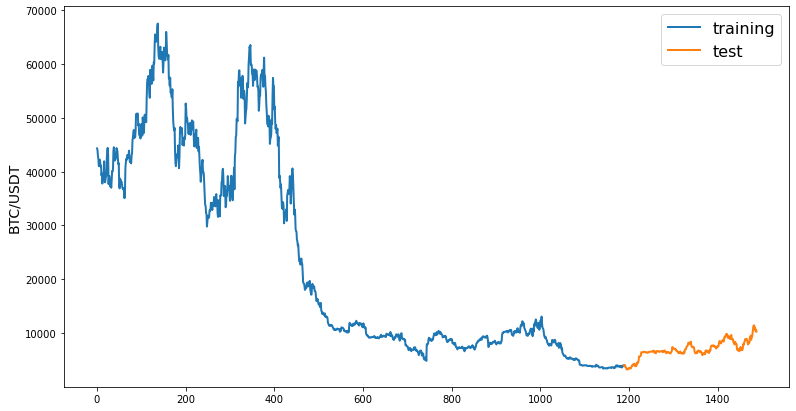

In [7]:
line_plot(y_train[aim], y_test[aim], 'training', 'test', title='')

In [8]:
def normalise_zero_base(continuous):
    return continuous / continuous.iloc[0] - 1

def normalise_min_max(continuous):
    return (continuous - continuous.min()) / (data.max() - continuous.min())

In [9]:
X_train = normalise_zero_base(X_train)
X_test = normalise_zero_base(X_test)
y_train = normalise_zero_base(y_train)
y_test = normalise_zero_base(y_test)

In [10]:
import numpy as np
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test,axis=1)

In [11]:
X_train.shape

(1189, 1, 3)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, PReLU, Input, Masking
import numpy as np

# Assuming you have already loaded and preprocessed your data
# ...

# The GRU architecture
gruMODEL = Sequential()

# Input layer with Masking to handle variable sequence lengths
gruMODEL.add(Input(shape=(None, 3)))
gruMODEL.add(Masking(mask_value=0.0))  # Assuming 0.0 represents padded values

# First GRU layer with Dropout regularization
gruMODEL.add(GRU(
    units=1024,
    activation='PReLU',
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    reset_after=True))
gruMODEL.add(Dropout(0.9))

# Continue with the rest of your model architecture...

# The output layer
gruMODEL.add(Dense(units=1))

# Compiling the RNN
gruMODEL.compile(optimizer="sgd", loss='mean_squared_error')
gruMODEL.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, None, 3)           0         
                                                                 
 gru (GRU)                   (None, 1024)              3162112   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 3163137 (12.07 MB)
Trainable params: 3163137 (12.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
layers = [3,15,30,45,90,1]

layers_str = ["Input"] + ["GRU"] * (len(layers) - 2) + ["Output"]
layers_col = ["none"] + ["none"] * (len(layers) - 2) + ["none"]
layers_fill = ["black"] + ["gray"] * (len(layers) - 2) + ["black"]

penwidth = 15
font = "Hilda 10"

print("digraph G {")
print("\tfontname = \"{}\"".format(font))
print("\trankdir=LR")
print("\tsplines=line")
print("\tnodesep=.08;")
print("\tranksep=1;")
print("\tedge [color=black, arrowsize=.5];")
print("\tnode [fixedsize=true,label=\"\",style=filled," + \
    "color=none,fillcolor=gray,shape=circle]\n")

# Clusters
for i in range(0, len(layers)):
    print(("\tsubgraph cluster_{} {{".format(i)))
    print(("\t\tcolor={};".format(layers_col[i])))
    print(("\t\tnode [style=filled, color=white, penwidth={},"
          "fillcolor={} shape=circle];".format(
              penwidth,
              layers_fill[i])))

    print(("\t\t"), end=' ')

    for a in range(layers[i]):
        print("l{}{} ".format(i + 1, a), end=' ')

    print(";")
    print(("\t\tlabel = {};".format(layers_str[i])))

    print("\t}\n")
    # Nodes
for i in range(1, len(layers)):
    for a in range(layers[i - 1]):
        for b in range(layers[i]):
            print("\tl{}{} -> l{}{}".format(i, a, i + 1, b))

print("}")

digraph G {
	fontname = "Hilda 10"
	rankdir=LR
	splines=line
	nodesep=.08;
	ranksep=1;
	edge [color=black, arrowsize=.5];
	node [fixedsize=true,label="",style=filled,color=none,fillcolor=gray,shape=circle]

	subgraph cluster_0 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=black shape=circle];
		 l10  l11  l12  ;
		label = Input;
	}

	subgraph cluster_1 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=gray shape=circle];
		 l20  l21  l22  l23  l24  l25  l26  l27  l28  l29  l210  l211  l212  l213  l214  ;
		label = GRU;
	}

	subgraph cluster_2 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=gray shape=circle];
		 l30  l31  l32  l33  l34  l35  l36  l37  l38  l39  l310  l311  l312  l313  l314  l315  l316  l317  l318  l319  l320  l321  l322  l323  l324  l325  l326  l327  l328  l329  ;
		label = GRU;
	}

	subgraph cluster_3 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=gray shape=circle];
	

	l418 -> l555
	l418 -> l556
	l418 -> l557
	l418 -> l558
	l418 -> l559
	l418 -> l560
	l418 -> l561
	l418 -> l562
	l418 -> l563
	l418 -> l564
	l418 -> l565
	l418 -> l566
	l418 -> l567
	l418 -> l568
	l418 -> l569
	l418 -> l570
	l418 -> l571
	l418 -> l572
	l418 -> l573
	l418 -> l574
	l418 -> l575
	l418 -> l576
	l418 -> l577
	l418 -> l578
	l418 -> l579
	l418 -> l580
	l418 -> l581
	l418 -> l582
	l418 -> l583
	l418 -> l584
	l418 -> l585
	l418 -> l586
	l418 -> l587
	l418 -> l588
	l418 -> l589
	l419 -> l50
	l419 -> l51
	l419 -> l52
	l419 -> l53
	l419 -> l54
	l419 -> l55
	l419 -> l56
	l419 -> l57
	l419 -> l58
	l419 -> l59
	l419 -> l510
	l419 -> l511
	l419 -> l512
	l419 -> l513
	l419 -> l514
	l419 -> l515
	l419 -> l516
	l419 -> l517
	l419 -> l518
	l419 -> l519
	l419 -> l520
	l419 -> l521
	l419 -> l522
	l419 -> l523
	l419 -> l524
	l419 -> l525
	l419 -> l526
	l419 -> l527
	l419 -> l528
	l419 -> l529
	l419 -> l530
	l419 -> l531
	l419 -> l532
	l419 -> l533
	l419 -> l534
	l419 -> l535
	l419 -> l536
	l

	l425 -> l527
	l425 -> l528
	l425 -> l529
	l425 -> l530
	l425 -> l531
	l425 -> l532
	l425 -> l533
	l425 -> l534
	l425 -> l535
	l425 -> l536
	l425 -> l537
	l425 -> l538
	l425 -> l539
	l425 -> l540
	l425 -> l541
	l425 -> l542
	l425 -> l543
	l425 -> l544
	l425 -> l545
	l425 -> l546
	l425 -> l547
	l425 -> l548
	l425 -> l549
	l425 -> l550
	l425 -> l551
	l425 -> l552
	l425 -> l553
	l425 -> l554
	l425 -> l555
	l425 -> l556
	l425 -> l557
	l425 -> l558
	l425 -> l559
	l425 -> l560
	l425 -> l561
	l425 -> l562
	l425 -> l563
	l425 -> l564
	l425 -> l565
	l425 -> l566
	l425 -> l567
	l425 -> l568
	l425 -> l569
	l425 -> l570
	l425 -> l571
	l425 -> l572
	l425 -> l573
	l425 -> l574
	l425 -> l575
	l425 -> l576
	l425 -> l577
	l425 -> l578
	l425 -> l579
	l425 -> l580
	l425 -> l581
	l425 -> l582
	l425 -> l583
	l425 -> l584
	l425 -> l585
	l425 -> l586
	l425 -> l587
	l425 -> l588
	l425 -> l589
	l426 -> l50
	l426 -> l51
	l426 -> l52
	l426 -> l53
	l426 -> l54
	l426 -> l55
	l426 -> l56
	l426 -> l57
	l426 -> l58
	

In [14]:
with open('model.txt', 'w') as layers:

  layers = [3,5,10,15,20,1]

  layers_str = ["Input"] + ["GRU"] * (len(layers) - 2) + ["Output"]
  layers_col = ["none"] + ["none"] * (len(layers) - 2) + ["none"]
  layers_fill = ["black"] + ["gray"] * (len(layers) - 2) + ["black"]

  penwidth = 15
  font = "Hilda 10"

  print("digraph G {")
  print("\tfontname = \"{}\"".format(font))
  print("\trankdir=LR")
  print("\tsplines=line")
  print("\tnodesep=.08;")
  print("\tranksep=1;")
  print("\tedge [color=black, arrowsize=.5];")
  print("\tnode [fixedsize=true,label=\"\",style=filled," + \
    "color=none,fillcolor=gray,shape=circle]\n")

  # Clusters
  for i in range(0, len(layers)):
      print(("\tsubgraph cluster_{} {{".format(i)))
      print(("\t\tcolor={};".format(layers_col[i])))
      print(("\t\tnode [style=filled, color=white, penwidth={},"
          "fillcolor={} shape=circle];".format(
              penwidth,
              layers_fill[i])))

      print(("\t\t"), end=' ')

      for a in range(layers[i]):
          print("l{}{} ".format(i + 1, a), end=' ')

      print(";")
      print(("\t\tlabel = {};".format(layers_str[i])))

      print("\t}\n")
      # Nodes
  for i in range(1, len(layers)):
      for a in range(layers[i - 1]):
          for b in range(layers[i]):
              print("\tl{}{} -> l{}{}".format(i, a, i + 1, b))

  print("}")

digraph G {
	fontname = "Hilda 10"
	rankdir=LR
	splines=line
	nodesep=.08;
	ranksep=1;
	edge [color=black, arrowsize=.5];
	node [fixedsize=true,label="",style=filled,color=none,fillcolor=gray,shape=circle]

	subgraph cluster_0 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=black shape=circle];
		 l10  l11  l12  ;
		label = Input;
	}

	subgraph cluster_1 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=gray shape=circle];
		 l20  l21  l22  l23  l24  ;
		label = GRU;
	}

	subgraph cluster_2 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=gray shape=circle];
		 l30  l31  l32  l33  l34  l35  l36  l37  l38  l39  ;
		label = GRU;
	}

	subgraph cluster_3 {
		color=none;
		node [style=filled, color=white, penwidth=15,fillcolor=gray shape=circle];
		 l40  l41  l42  l43  l44  l45  l46  l47  l48  l49  l410  l411  l412  l413  l414  ;
		label = GRU;
	}

	subgraph cluster_4 {
		color=none;
		node [style=filled, color=white, p

In [15]:
!python python.py | dot -Tpdf > model_visulation.pdf

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
# Fitting to the training set
import tensorflow as tf

models = gruMODEL.fit(X_train,
                      y_train,
                      epochs=32,
                      batch_size=250,
                      validation_data=(X_test,y_test),
                      callbacks=[tf.keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")])


Epoch 1/32

5/5 [==============================] - 2s 99ms/step - loss: 0.3851 - val_loss: 0.7577
Epoch 2/32
3/5 [=================>............] - ETA: 0s - loss: 0.3311

C:\Users\Paxto\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 43ms/step - loss: 0.3130 - val_loss: 0.8131
Epoch 3/32
5/5 [==============================] - 0s 38ms/step - loss: 0.2585 - val_loss: 0.8609
Epoch 4/32
5/5 [==============================] - 0s 41ms/step - loss: 0.2158 - val_loss: 0.9007
Epoch 5/32
5/5 [==============================] - 0s 41ms/step - loss: 0.1856 - val_loss: 0.9333
Epoch 6/32
5/5 [==============================] - 0s 39ms/step - loss: 0.1640 - val_loss: 0.9601
Epoch 7/32
5/5 [==============================] - 0s 43ms/step - loss: 0.1435 - val_loss: 0.9810
Epoch 8/32
5/5 [==============================] - 0s 41ms/step - loss: 0.1302 - val_loss: 0.9970
Epoch 9/32
5/5 [==============================] - 0s 40ms/step - loss: 0.1203 - val_loss: 1.0086
Epoch 10/32
5/5 [==============================] - 0s 42ms/step - loss: 0.1145 - val_loss: 1.0165
Epoch 11/32
5/5 [==============================] - 0s 41ms/step - loss: 0.1066 - val_loss: 1.0208
Epoch 12/32
5/5 [======================

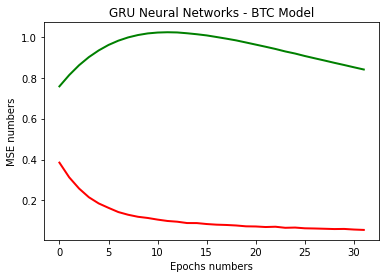

In [18]:
import matplotlib.pyplot as plt
plt.plot(models.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(models.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('GRU Neural Networks - BTC Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [19]:
from tensorflow.keras.models import load_model
model = load_model('/content/model/model_32.h5')

preds = gruMODEL.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

10/10 [==============================] - 0s 2ms/step


0.8497295035412752

In [20]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE

0.8401389941304702

In [21]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, preds)
r2_score*100

-424.4716312887309

In [22]:
y_test.to_numpy().ravel().shape


(300,)

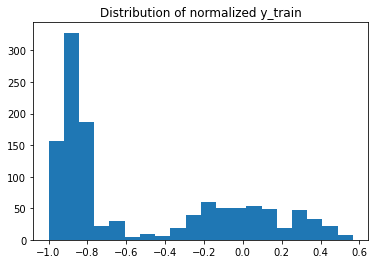

In [23]:
# Assuming you have already loaded and preprocessed your data
# ...
from sklearn.preprocessing import MinMaxScaler

# Handle NaN values in y_train
y_train.fillna(y_train.mean(), inplace=True)

# Create a MinMaxScaler
scaling = MinMaxScaler()

# Check for infinite or large values in y_train
if not np.isfinite(y_train.values).any().item():
    raise ValueError("Training data contains infinite values")

# Fit the scaler on your training data
y_train.iloc[:] = scaling.fit_transform(y_train.values.reshape(-1,1))

# Transform and normalize y_train
y_train_normalized = normalise_zero_base(y_train)

# Handle infinite values by replacing them with a large finite value
y_train_normalized.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train_normalized.fillna(1e9, inplace=True)

# Check for NaN or infinite values after MinMaxScaler
if not np.isfinite(y_train_normalized).all().item():
    print("NaN or infinite values found in normalized training data")
    nan_indices = np.isnan(y_train_normalized)
    inf_indices = np.isinf(y_train_normalized)
    print("NaN indices:", np.where(nan_indices))
    print("Infinite indices:", np.where(inf_indices))
    raise ValueError("Normalized training data contains NaN or infinite values")

# Visualize the distribution of normalized y_train
plt.hist(y_train_normalized, bins=20)
plt.title('Distribution of normalized y_train')
plt.show()


In [24]:
preds = scaling.inverse_transform(gruMODEL.predict(X_test))

10/10 [==============================] - 0s 2ms/step


Text(0, 0.5, 'BTC/USDT')

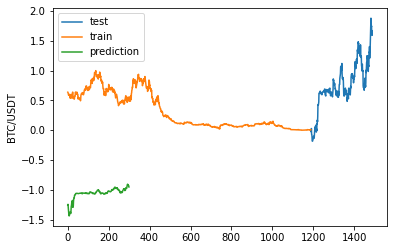

In [25]:
import matplotlib.pyplot as plt

plt.plot(y_test)
plt.plot(y_train)
plt.plot(preds)
plt.legend(['test', 'train','prediction'])
plt.ylabel('BTC/USDT')

27 March Prediction = **46351.24609375 BTC/USDT**

27 March 02.22AM (Istanbul Time) = **46564.0000 BTC/USDT**

In [26]:
prediction = np.array([[44331,44818,44090]])
X_testt = scaling.inverse_transform(X_test[0])
prediction_new = np.array([[(X_test[0][0]/X_testt[0]*prediction[0])]])
predictions = gruMODEL.predict(prediction_new)[0][0]
predictions = np.array([[predictions]]) * prediction[0][0] / prediction_new[0][0][0]
f"27 March Prediction is {predictions[0][0]} BTC/USDT"

1/1 [==============================] - 0s 23ms/step


C:\Users\Paxto\AppData\Local\Temp\ipykernel_36028\3822157878.py:5: RuntimeWarning: divide by zero encountered in divide
  predictions = np.array([[predictions]]) * prediction[0][0] / prediction_new[0][0][0]


'27 March Prediction is inf BTC/USDT'

In [27]:
print("27 March Accuracy: ")
real = 46564
predict = predictions[0][0]

# Check if the denominator is zero
if real != 0:
    accuracy = 1 - (real - predictions[0][0]) / real
    print("Accuracy: {}".format(accuracy))
else:
    # Handle the case where real is zero (to avoid division by zero)
    accuracy = 1.0
    print("Accuracy: {}".format(accuracy))


27 March Accuracy: 
Accuracy: inf


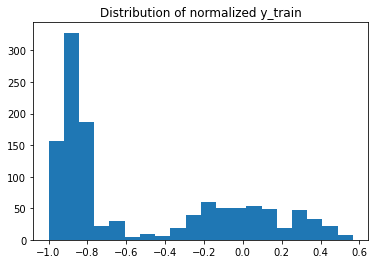

27 March Accuracy: 
Accuracy: inf


In [28]:
# Handle NaN values in y_train
y_train.fillna(y_train.mean(), inplace=True)

y_train.iloc[:] = scaling.fit_transform(y_train.values.reshape(-1,1))


# Check for NaN or infinite values after MinMaxScaler
if not np.isfinite(y_train_normalized).all().item():
    print("NaN or infinite values found in normalized training data")
    nan_indices = np.isnan(y_train_normalized)
    inf_indices = np.isinf(y_train_normalized)
    print("NaN indices:", np.where(nan_indices))
    print("Infinite indices:", np.where(inf_indices))
    raise ValueError("Normalized training data contains NaN or infinite values")

# Visualize the distribution of normalized y_train
plt.hist(y_train_normalized, bins=20)
plt.title('Distribution of normalized y_train')
plt.show()


# Prediction Accuracy
print("27 March Accuracy: ")
real = 46564
predict = predictions[0][0]

# Check if the denominator is zero
if real != 0:
    accuracy = 1 - (real - predictions[0][0]) / real
    print("Accuracy: {}".format(accuracy))
else:
    # Handle the case where real is zero (to avoid division by zero)
    accuracy = 1.0
    print("Accuracy: {}".format(accuracy))


Epoch 1/32
5/5 [==============================] - 0s 47ms/step - loss: 0.6013 - val_loss: 0.7031
Epoch 2/32
3/5 [=================>............] - ETA: 0s - loss: 0.4680

C:\Users\Paxto\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 44ms/step - loss: 0.4487 - val_loss: 0.5968
Epoch 3/32
5/5 [==============================] - 0s 39ms/step - loss: 0.3336 - val_loss: 0.5142
Epoch 4/32
5/5 [==============================] - 0s 42ms/step - loss: 0.2537 - val_loss: 0.4490
Epoch 5/32
5/5 [==============================] - 0s 42ms/step - loss: 0.1938 - val_loss: 0.3972
Epoch 6/32
5/5 [==============================] - 0s 44ms/step - loss: 0.1518 - val_loss: 0.3557
Epoch 7/32
5/5 [==============================] - 0s 45ms/step - loss: 0.1219 - val_loss: 0.3222
Epoch 8/32
5/5 [==============================] - 0s 43ms/step - loss: 0.0993 - val_loss: 0.2946
Epoch 9/32
5/5 [==============================] - 0s 40ms/step - loss: 0.0821 - val_loss: 0.2717
Epoch 10/32
5/5 [==============================] - 0s 41ms/step - loss: 0.0697 - val_loss: 0.2527
Epoch 11/32
5/5 [==============================] - 0s 40ms/step - loss: 0.0607 - val_loss: 0.2369
Epoch 12/32
5/5 [======================

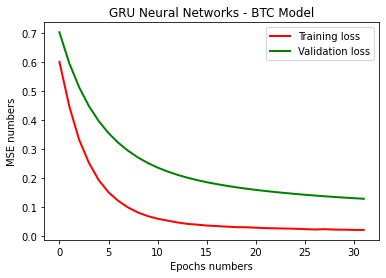

10/10 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.12936864640616208
R-squared (R2) Score: 19.239333619458233%


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Fitting to the training set
models = gruMODEL.fit(X_train,
                      y_train,
                      epochs=32,
                      batch_size=250,
                      validation_data=(X_test, y_test),
                      callbacks=[tf.keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")])

# Plot training and validation loss
plt.plot(models.history['loss'], 'r', linewidth=2, label='Training loss')
plt.plot(models.history['val_loss'], 'g', linewidth=2, label='Validation loss')
plt.title('GRU Neural Networks - BTC Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.legend()
plt.show()

# Evaluate the model
preds = gruMODEL.predict(X_test).squeeze()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, preds)
print(f"R-squared (R2) Score: {r2 * 100}%")


Epoch 1/32
5/5 [==============================] - 0s 48ms/step - loss: 0.0207 - val_loss: 0.1275
Epoch 2/32
3/5 [=================>............] - ETA: 0s - loss: 0.0199

C:\Users\Paxto\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 44ms/step - loss: 0.0202 - val_loss: 0.1257
Epoch 3/32
5/5 [==============================] - 0s 39ms/step - loss: 0.0193 - val_loss: 0.1240
Epoch 4/32
5/5 [==============================] - 0s 40ms/step - loss: 0.0190 - val_loss: 0.1224
Epoch 5/32
5/5 [==============================] - 0s 42ms/step - loss: 0.0192 - val_loss: 0.1209
Epoch 6/32
5/5 [==============================] - 0s 40ms/step - loss: 0.0187 - val_loss: 0.1194
Epoch 7/32
5/5 [==============================] - 0s 48ms/step - loss: 0.0180 - val_loss: 0.1180
Epoch 8/32
5/5 [==============================] - 0s 49ms/step - loss: 0.0176 - val_loss: 0.1167
Epoch 9/32
5/5 [==============================] - 0s 46ms/step - loss: 0.0172 - val_loss: 0.1154
Epoch 10/32
5/5 [==============================] - 0s 43ms/step - loss: 0.0171 - val_loss: 0.1142
Epoch 11/32
5/5 [==============================] - 0s 43ms/step - loss: 0.0159 - val_loss: 0.1131
Epoch 12/32
5/5 [======================

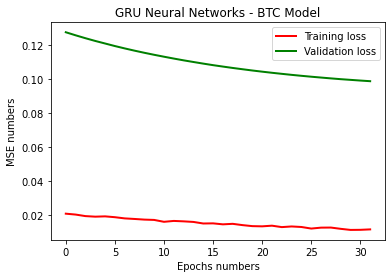

10/10 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.09870564578937736
R-squared (R2) Score: 38.38125426121694%


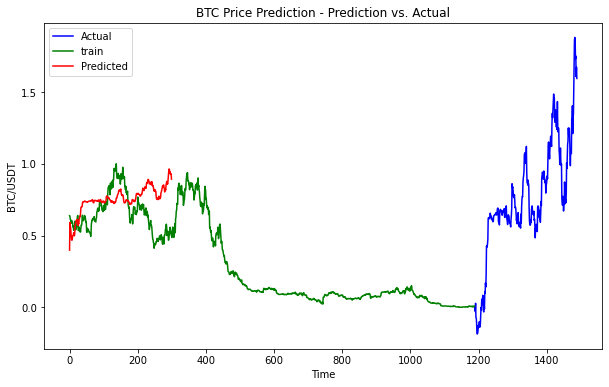

In [32]:
# Fitting to the training set
models = gruMODEL.fit(X_train,
                      y_train,
                      epochs=32,
                      batch_size=250,
                      validation_data=(X_test, y_test),
                      callbacks=[tf.keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")])


# Plot training and validation loss
plt.plot(models.history['loss'], 'r', linewidth=2, label='Training loss')
plt.plot(models.history['val_loss'], 'g', linewidth=2, label='Validation loss')
plt.title('GRU Neural Networks - BTC Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.legend()
plt.show()

# Evaluate the model
preds = gruMODEL.predict(X_test).squeeze()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, preds)
print(f"R-squared (R2) Score: {r2 * 100}%")

# Visualization: Prediction vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_train, label='train', color='green')
plt.plot(preds, label='Predicted', color='red')
plt.title('BTC Price Prediction - Prediction vs. Actual')
plt.xlabel('Time')
plt.ylabel('BTC/USDT')
plt.legend()
plt.show()
